# **Conexão com o Google Drive**

In [ ]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Instalação das bibliotecas**

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install nltk
!pip install unidecode
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **importação de bibliotecas**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# **Testes Isolados**

In [ ]:
df = pd.read_excel('1.Base Inicial (1).xlsx')
df.head(10)

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,btgpactual,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
5,5,6,btgpactual,"@bastosroberio Olá,tudo bem?\n\nHoje cobramos ...",CkG9KXjpY2B,reply,REELS,17936864405329104,17922908603504906,https://www.instagram.com/p/CkG9KXjpY2B/c/1792...,2022-10-25 09:40:35,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
6,6,7,btgpactual,@drmilior Olá! Tudo bem? \n\nTem sim! Você pod...,CkG9KXjpY2B,reply,REELS,18016933294444436,17988361012608637,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 09:37:43,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
7,7,8,btgpactual,"@galdino.runner, agradecemos o seu feedback! C...",CkG9KXjpY2B,reply,REELS,17951026520271188,18005904001497494,https://www.instagram.com/p/CkG9KXjpY2B/c/1800...,2022-10-24 18:04:21,2022-10-25 21:52:56,-1.0,0.0,0.0,-1.0
8,8,9,btgpactual,"Olá, Roni! Tudo bem?\n\nHoje cobramos uma corr...",CkG9KXjpY2B,reply,REELS,17872872965780335,17845248896858599,https://www.instagram.com/p/CkG9KXjpY2B/c/1784...,2022-10-24 18:03:21,2022-10-25 21:52:56,-1.0,0.0,0.0,-1.0
9,9,10,btgpactual,@thlimaoficial 💙 🚀,CkG9KXjpY2B,reply,REELS,18160982416248106,18000409306478035,https://www.instagram.com/p/CkG9KXjpY2B/c/1800...,2022-10-24 17:12:00,2022-10-25 21:52:56,-1.0,0.0,0.0,-1.0


In [ ]:
#pega apenas a coluna 'texto'
texto = df['texto']
print(texto)

0       Olá, Ana Paula! Como vai?\n\nSentimos muito pe...
1       Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...
2                            @luizantoniojovinodossan 🚀 💙
3       @ronialencar Boa tarde! Tudo bem?\n\nLamentamo...
4       Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...
                              ...                        
4544    Estão contratando muitos blogueiros, mas eu fi...
4545                                            @xubs._ 💙
4546                        Agradecemos o seu feedback! 💙
4547                           Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼
4548                                        Excelência! 👏
Name: texto, Length: 4549, dtype: object


In [ ]:
autor = df['autor'].count()
autor

4449

In [ ]:
df_filtered = df.loc[df['autor'] != 'btgpactual']
df_filtered

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
10,10,11,matheusriosortodontia,@gustavopaulinno Realmente. Ja rodei por aí e ...,CkG9KXjpY2B,reply,REELS,17961352247055161,17983688287717831,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-24 17:40:49,2022-10-25 21:52:56,-1.0,0.0,0.0,-1.0
13,13,14,erikacoimbra,👏👏👏,CkG9KXjpY2B,comment,REELS,17943066782219685,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1794...,2022-10-25 19:13:45,2022-10-25 21:52:57,-1.0,0.0,0.0,-1.0
14,14,15,anapaulanakade,"O app está travando desde ontem, está em manut...",CkG9KXjpY2B,comment,REELS,17988010663613927,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 12:54:54,2022-10-25 21:52:57,-1.0,0.0,0.0,-1.0
15,15,16,rosanakassar,"Abri uma conta, mas achei muito complicado inv...",CkG9KXjpY2B,comment,REELS,17955765434145877,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:03:51,2022-10-25 21:52:58,-1.0,0.0,0.0,-1.0
16,16,17,luizantoniojovinodossan,👏,CkG9KXjpY2B,comment,REELS,17868806699792839,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 00:30:31,2022-10-25 21:52:58,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,4542,3028275,gui.decicco,Participe da conferência econômica mais import...,Cn5MCVvP1H3,mention,CAROUSEL_ALBUM,17989315081750052,-,https://www.instagram.com/p/Cn5MCVvP1H3/,2023-01-26 18:31:44,2023-01-26 18:35:02,-1.0,0.0,0.0,-1.0
4543,4543,3028307,giballiana,A melhor que temos 🥰🥰,Cn4bcg7LM4t,comment,REELS,17913917285610958,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1791...,2023-01-26 18:47:19,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


In [ ]:
df['tipoInteracao'].value_counts()

comment              2585
reply                1208
mention               600
17989148149644662       1
17941425488528299       1
17940168110581080       1
18029962657439794       1
17892130889753631       1
17959643528485936       1
17956093724502556       1
17955500384497942       1
17953032530489386       1
17936406785531503       1
18079494631320397       1
17947308392256542       1
17959562249183697       1
17972701729819821       1
17984662891640337       1
17996365177604135       1
17934517190439239       1
17962619965952420       1
17986664653725147       1
17989225051630664       1
18186008719240695       1
17969932015944037       1
18002867089480998       1
17960657227952465       1
17963686748049432       1
18060774460321501       1
17989677946559344       1
17991378589686392       1
Name: tipoInteracao, dtype: int64

In [ ]:
#Calcula a quantidade de publicacoes em diferentes tipos de midia
df['tipoMidia'].value_counts()

REELS                2016
FEED                 1777
IMAGE                 215
VIDEO                 201
CAROUSEL_ALBUM        184
-                      24
18015162967458592       1
18008430814504778       1
17869519748783145       1
18171016729261171       1
Name: tipoMidia, dtype: int64

# Funções

1) Stopwords, Tokenização e Pontuação

In [ ]:
stop_words = set(stopwords.words('portuguese'))

def tokenize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    else:
        tokens = []
    return tokens

df['tokenized_text'] = df['texto'].apply(tokenize_text)
print(df['tokenized_text'][0])

['olá', 'ana', 'paula', 'vai', 'sentimos', 'ocorrrido', 'enviamos', 'mensagem', 'privada', 'ajudar', 'assertividade']


2)Tokenização

In [ ]:
def tokenize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
    else:
        tokens = []
    return tokens
df['tokenized_text'] = df['texto'].apply(tokenize_text)
print(df['tokenized_text'][0])

['Olá', ',', 'Ana', 'Paula', '!', 'Como', 'vai', '?', 'Sentimos', 'muito', 'pelo', 'ocorrrido', '.', 'Te', 'enviamos', 'uma', 'mensagem', 'privada', 'para', 'te', 'ajudar', 'com', 'mais', 'assertividade', '!']


3)Steeming

In [ ]:
import unicodedata
from nltk.stem.snowball import SnowballStemmer

def preprocess_text(text):
    if isinstance(text, str):
        text = ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')
        text = text.lower()
    
        stemmer = SnowballStemmer('portuguese')
        words = text.split()
        words = [stemmer.stem(word) for word in words]
        text = ' '.join(words)
        return text
    else:
        return text
df['processed_text'] = df['texto'].apply(preprocess_text)
print(df['processed_text'][0])

ola, ana paula! com vai? sent muit pel ocorrrido. te envi uma mensag priv par te ajud com mais assertividade!


In [ ]:
import string
import unicodedata
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords_list = stopwords.words('portuguese')

def stemming_text(text):
    if isinstance(text, str):
        # remove pontuacao
        text = text.translate(str.maketrans('', '', string.punctuation))

        # remove acentos e coloca tudo em minusculo
        text = ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')
        text = text.lower()

        # tokeniza o texto
        tokens = word_tokenize(text)

        # remove as stopwords
        tokens = [token for token in tokens if token not in stopwords_list]

        stemmer = SnowballStemmer('portuguese')
        tokens = [stemmer.stem(token) for token in tokens]
        text = ' '.join(tokens)
        return text
    else:
        return text

df_filtered['processed_text'] = df['texto'].apply(stemming_text)
print(df['processed_text'][0])

ola, ana paula! com vai? sent muit pel ocorrrido. te envi uma mensag priv par te ajud com mais assertividade!


<ipython-input-18-809be43f20e3>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['processed_text'] = df['texto'].apply(stemming_text)


4)Remove os acentos

In [ ]:
import unicodedata

# define a funcao pra remove os acentos e deixar tudo em letra minuscula
def remove_accents_and_lowercase(text):
    if isinstance(text, str):
        text = ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')
        return text.lower()
    else:
        return text

df['texto_processed'] = df['texto'].apply(remove_accents_and_lowercase)
print(df['texto_processed'][0:5])

0    ola, ana paula! como vai?\n\nsentimos muito pe...
1    ola, rosana! tudo bem?\n\npara te orientarmos ...
2                         @luizantoniojovinodossan 🚀 💙
3    @ronialencar boa tarde! tudo bem?\n\nlamentamo...
4    oi, nelson! tudo bem?\n\npossuimos solucoes co...
Name: texto_processed, dtype: object


# Implementação dos graficos

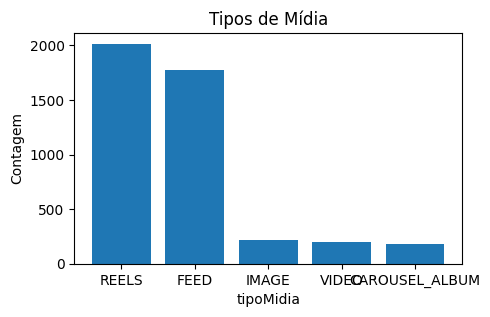

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
#importacao do grafico de tipo de midia
tipo_midia_counts = df['tipoMidia'].value_counts().head(5)
plt.title('Tipos de Mídia')
plt.bar(tipo_midia_counts.index, tipo_midia_counts.values)
plt.xlabel('tipoMidia')
plt.ylabel('Contagem')
plt.show()

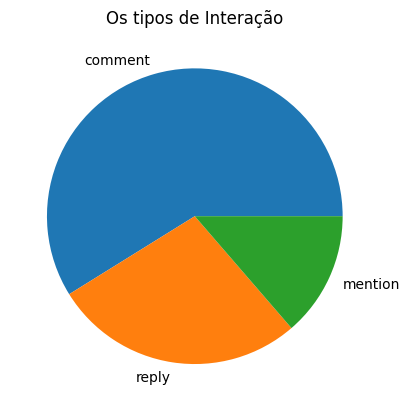

In [ ]:
top_mediatypes = df.groupby(['tipoInteracao']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(3)
plt.pie(top_mediatypes['counts'], labels=top_mediatypes['tipoInteracao'])
plt.title('Os tipos de Interação')
plt.show()

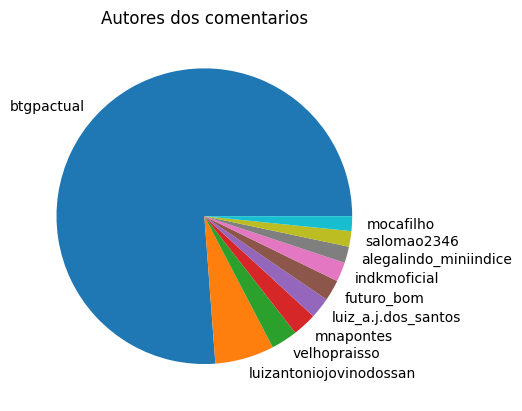

In [ ]:
top_mediatypes = df.groupby(['autor']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)
plt.pie(top_mediatypes['counts'], labels=top_mediatypes['autor'])
plt.title('Autores dos comentarios')
plt.show()

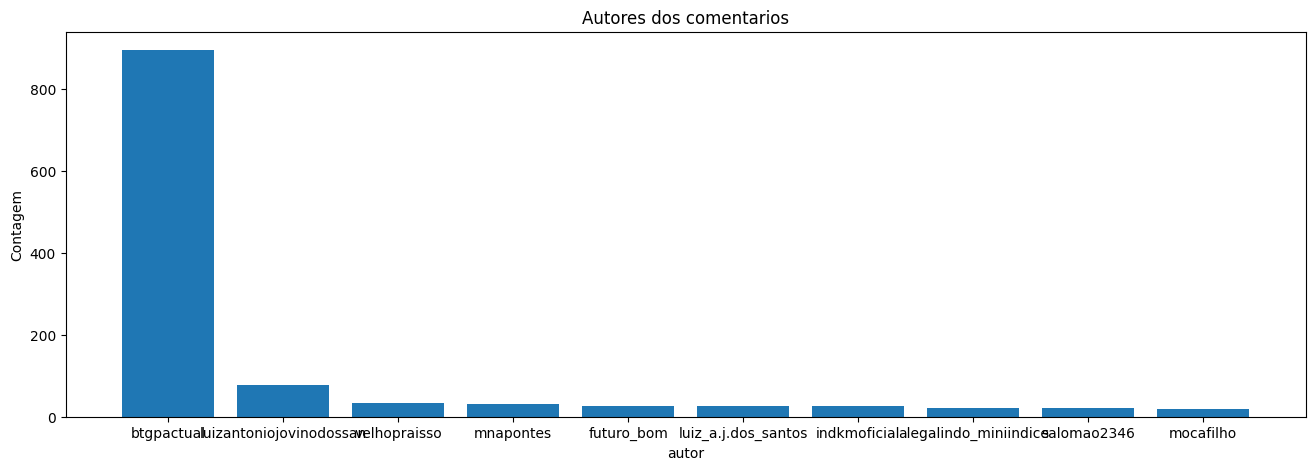

In [ ]:
#tamanho maior
plt.figure(figsize=(16, 5))

#importacao do grafico de tipo de midia
tipo_midia_counts = df['autor'].value_counts().head(10)
plt.title('Autores dos comentarios')
plt.bar(tipo_midia_counts.index, tipo_midia_counts.values)
plt.xlabel('autor')
plt.ylabel('Contagem')
# mostra o gráfico
plt.show()